In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [14]:
matchesData = pd.read_csv("CMWRLP1_ChampStrength_ChampWR.csv")
mapping = {'Win': 1, 'Fail': 0}

matchesData = matchesData.replace({'TeamTwoWin': mapping})
response = np.array(matchesData["TeamTwoWin"])

mapping2 = {'NaN': 50.00}
matchesData = matchesData.replace({'Team1P1WR': mapping2, 'Team1P2WR': mapping2,'Team1P3WR': mapping2,'Team1P4WR': mapping2,'Team1P5WR': mapping2,'Team2P1WR': mapping2,'Team2P2WR': mapping2,'Team2P3WR': mapping2,'Team2P4WR': mapping2,'Team2P5WR': mapping2})
#matchesData = matchesData.replace({"T1P1LP": mapping2,"T1P2LP": mapping2,"T1P3LP": mapping2,"T1P4LP": mapping2,"T1P5LP": mapping2,"T2P1LP": mapping2,"T2P2LP": mapping2,"T2P3LP": mapping2,"T2P4LP": mapping2,"T2P5LP": mapping2,"T1P1WR": mapping2,"T1P2WR": mapping2,"T1P3WR": mapping2,"T1P4WR": mapping2,"T1P5WR": mapping2,"T2P1WR": mapping2,"T2P2WR": mapping2,"T2P3WR": mapping2,"T2P4WR": mapping2,"T2P5WR": mapping2,"T1P1CM": mapping2,"T1P2CM": mapping2,"T1P3CM": mapping2,"T1P4CM": mapping2,"T1P5CM": mapping2,"T2P1CM": mapping2,"T2P2CM": mapping2,"T2P3CM": mapping2,"T2P4CM": mapping2,"T2P5CM": mapping2,"Team1P1PostChampOccurTimes": mapping2,"Team1P2PostChampOccurTimes": mapping2,"Team1P3PostChampOccurTimes": mapping2,"Team1P4PostChampOccurTimes": mapping2,"Team1P5PostChampOccurTimes": mapping2,"Team2P1PostChampOccurTimes": mapping2,"Team2P2PostChampOccurTimes": mapping2,"Team2P3PostChampOccurTimes": mapping2,"Team2P4PostChampOccurTimes": mapping2,"Team2P5PostChampOccurTimes": mapping2,"Team1P1PostPositiveScore": mapping2,"Team1P2PostPositiveScore": mapping2,"Team1P3PostPositiveScore": mapping2,"Team1P4PostPositiveScore": mapping2,"Team1P5PostPositiveScore": mapping2,"Team2P1PostPositiveScore": mapping2,"Team2P2PostPositiveScore": mapping2,"Team2P3PostPositiveScore": mapping2,"Team2P4PostPositiveScore": mapping2,"Team2P5PostPositiveScore": mapping2,"Team1P1PostNegativeScore": mapping2,"Team1P2PostNegativeScore": mapping2,"Team1P3PostNegativeScore": mapping2,"Team1P4PostNegativeScore": mapping2,"Team1P5PostNegativeScore": mapping2,"Team2P1PostNegativeScore": mapping2,"Team2P2PostNegativeScore": mapping2,"Team2P3PostNegativeScore": mapping2,"Team2P4PostNegativeScore": mapping2,"Team2P5PostNegativeScore": mapping2,"T1P1ChampWR": mapping2,"T1P2ChampWR": mapping2,"T1P3ChampWR": mapping2,"T1P4ChampWR": mapping2,"T1P5ChampWR": mapping2,"T2P1ChampWR": mapping2,"T2P2ChampWR": mapping2,"T2P3ChampWR": mapping2,"T2P4ChampWR": mapping2,"T2P5ChampWR": mapping2})
#response

In [15]:
#predictors = np.array(matchesData[["T1P1LP","T1P2LP","T1P3LP","T1P4LP","T1P5LP","T2P1LP","T2P2LP","T2P3LP","T2P4LP","T2P5LP","T1P1WR","T1P2WR","T1P3WR","T1P4WR","T1P5WR","T2P1WR","T2P2WR","T2P3WR","T2P4WR","T2P5WR","T1P1CM","T1P2CM","T1P3CM","T1P4CM","T1P5CM","T2P1CM","T2P2CM","T2P3CM","T2P4CM","T2P5CM","Team1P1PostChampOccurTimes","Team1P2PostChampOccurTimes","Team1P3PostChampOccurTimes","Team1P4PostChampOccurTimes","Team1P5PostChampOccurTimes","Team2P1PostChampOccurTimes","Team2P2PostChampOccurTimes","Team2P3PostChampOccurTimes","Team2P4PostChampOccurTimes","Team2P5PostChampOccurTimes","Team1P1PostPositiveScore","Team1P2PostPositiveScore","Team1P3PostPositiveScore","Team1P4PostPositiveScore","Team1P5PostPositiveScore","Team2P1PostPositiveScore","Team2P2PostPositiveScore","Team2P3PostPositiveScore","Team2P4PostPositiveScore","Team2P5PostPositiveScore","Team1P1PostNegativeScore","Team1P2PostNegativeScore","Team1P3PostNegativeScore","Team1P4PostNegativeScore","Team1P5PostNegativeScore","Team2P1PostNegativeScore","Team2P2PostNegativeScore","Team2P3PostNegativeScore","Team2P4PostNegativeScore","Team2P5PostNegativeScore","T1P1ChampWR","T1P2ChampWR","T1P3ChampWR","T1P4ChampWR","T1P5ChampWR","T2P1ChampWR","T2P2ChampWR","T2P3ChampWR","T2P4ChampWR","T2P5ChampWR"]])

#just lp & wr as predictors works the best
predictors = np.array(matchesData[["T1P1LP","T1P2LP","T1P3LP","T1P4LP","T1P5LP","T2P1LP","T2P2LP","T2P3LP","T2P4LP","T2P5LP","T1P1WR","T1P2WR","T1P3WR","T1P4WR","T1P5WR","T2P1WR","T2P2WR","T2P3WR","T2P4WR","T2P5WR"]])
predictors

array([[5.10000000e+02, 3.94000000e+02, 1.15900000e+03, ...,
        5.38775510e-01, 5.75757576e-01, 5.44000000e-01],
       [1.02500000e+03, 1.33100000e+03, 8.17000000e+02, ...,
        5.44000000e-01, 5.63258232e-01, 5.44000000e-01],
       [1.14000000e+03, 2.00000000e+02, 2.00000000e+02, ...,
        5.44513458e-01, 5.38626609e-01, 5.34883721e-01],
       ...,
       [3.92000000e+02, 2.00000000e+02, 7.13000000e+02, ...,
        5.38860104e-01, 5.74829932e-01, 5.18590998e-01],
       [1.10900000e+03, 3.53000000e+02, 6.23000000e+02, ...,
        5.53571429e-01, 5.44444444e-01, 5.26392962e-01],
       [7.91000000e+02, 1.13200000e+03, 1.10900000e+03, ...,
        5.44000000e-01, 5.51111111e-01, 5.37313433e-01]])

In [16]:
clf = LogisticRegression(random_state=0).fit(predictors, response)
clf.predict(predictors)
clf.score(predictors, response)

0.6043524794862647

Text(0.5, 1.0, 'Sklearns logistic regression')

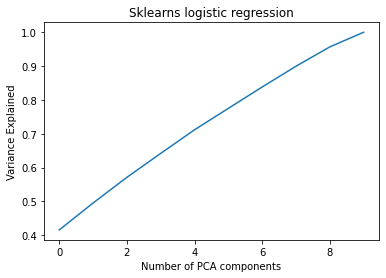

In [17]:
pca = PCA(n_components=10)
pca.fit(predictors)
xpca = pca.transform(predictors)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Variance Explained')
plt.xlabel('Number of PCA components')
plt.title('Sklearns logistic regression')